In [2]:
import pandas as pd
import re
import pickle
import spacy
from spacy.lang.en import English

In [3]:
# Abstract-text-cleaning:leave numbers!
# remove special characters and stop words (delete word indicate tense; creat a new stopword list)
#(note: tense can help with the classification; protocol : future tense ; compeleted RCT: past tense)
#tokenlization and lemma

In [4]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [5]:
nlp = spacy.load('en')

In [6]:
nlp.Defaults.stop_words -= {"will","had","was","were","did"}

In [7]:
new_stopwords = spacy_stopwords

In [8]:
def clean_text(x):
  #x=re.sub(r"\'ll"," will ",x) ----  In academic paper, people tend not to use contraction
  x=re.sub('[^a-zA-Z0-9]', ' ',x).lower()
  x = x.split()
  new_list = []
  for word in x:
    if word not in new_stopwords:
      new_list.append(word)
  return " ".join(new_list)

In [9]:
def preprocess_text(df):
    df.Abstract = df.Abstract.fillna(' ')
    df.Abstract = df.Abstract.str.replace('\n',' ')
    df.Abstract = df.Abstract.str.replace('\r',' ')
    return df

In [10]:
df_train = pd.read_pickle('C:/Users/Combined_train.pkl')
df_valid = pd.read_pickle('C:/Users/Combined_valid.pkl')

In [11]:
#df_train = pd.read_pickle('D:/NLP/CAM2_train.pkl')
#df_valid = pd.read_pickle('D:/NLP/CAM2_valid.pkl')

In [12]:
preprocess_text(df_train)
preprocess_text(df_valid)

,Abstract,AbL
78,The aim of the study was to investigate the ef...,1
31,Mental disorders and sleep dysfunction are com...,1
3,This study aimed to investigate the effects of...,1
55,"This study investigated the effect of a brief,...",1
145,Fibromyalgia is a condition characterised by c...,1
...,...,...
119,Biological signaling and communication between...,1
82,Given the importance of developmental transiti...,1
114,To study the differentiation of symptoms and s...,1
3,Ninety-two prenatally depressed pregnant women...,1


In [13]:
df_train['Abstract'] = df_train.Abstract.apply(lambda x:clean_text(x))

In [14]:
df_valid['Abstract'] = df_valid.Abstract.apply(lambda x:clean_text(x))

In [14]:
# Exploratory data analysis (EDA)

# Word Cloud

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [15]:
df_valid1= df_valid[df_valid.AbL == 1]
df_valid0= df_valid[df_valid.AbL == 0]
df_train1= df_train[df_train.AbL == 1]
df_train0= df_train[df_train.AbL == 0]

Word Cloud for valid set with AbL as 0

In [18]:
comment_words = ''
for val in df_valid0.Abstract: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "

In [19]:
wordcloudvalid0 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 

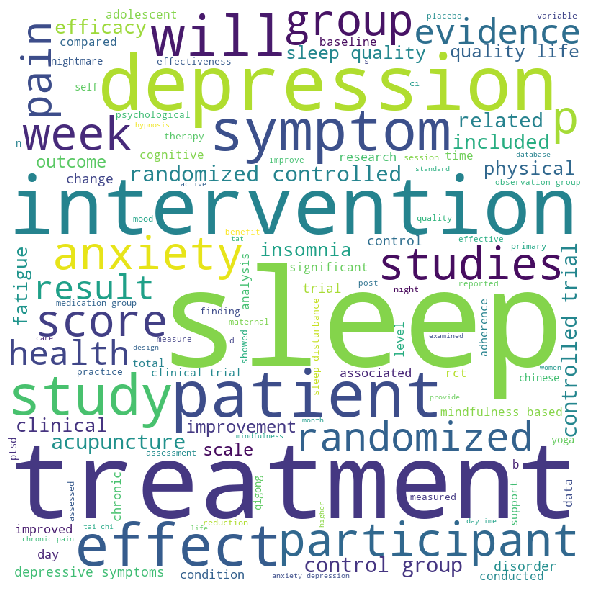

In [20]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloudvalid0) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word Cloud for valid set with AbL as 1

In [21]:
comment_words = ''
for val in df_valid0.Abstract: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "

In [22]:
wordcloudvalid1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 

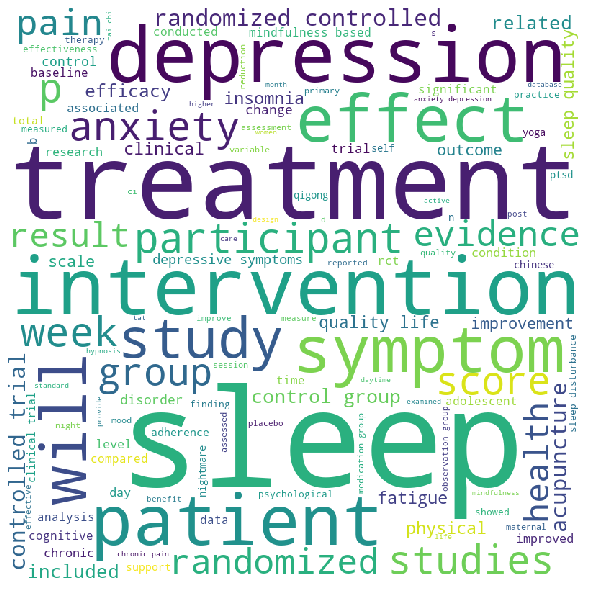

In [23]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloudvalid1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word Cloud for train set with AbL as 0

In [24]:
comment_words = ''
for val in df_train0.Abstract: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "

In [25]:
wordcloudtrain0 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 

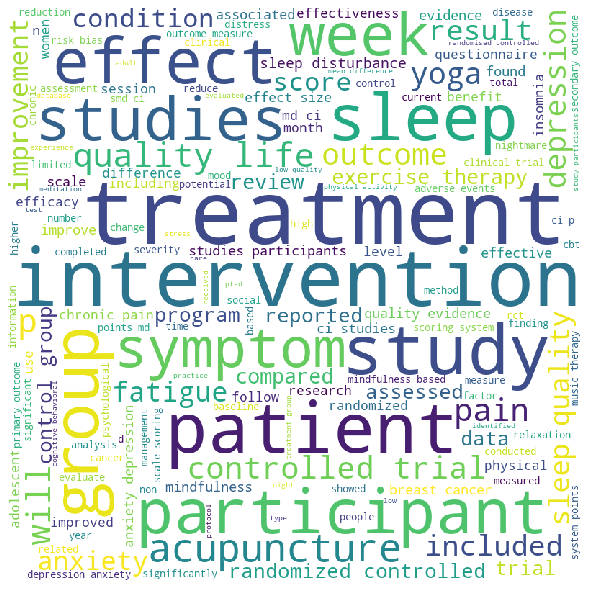

In [26]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloudtrain0) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word Cloud for train set with AbL as 1

In [27]:
comment_words = ''
for val in df_train1.Abstract: 
    val = str(val) 
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "

In [28]:
wordcloudtrain1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 

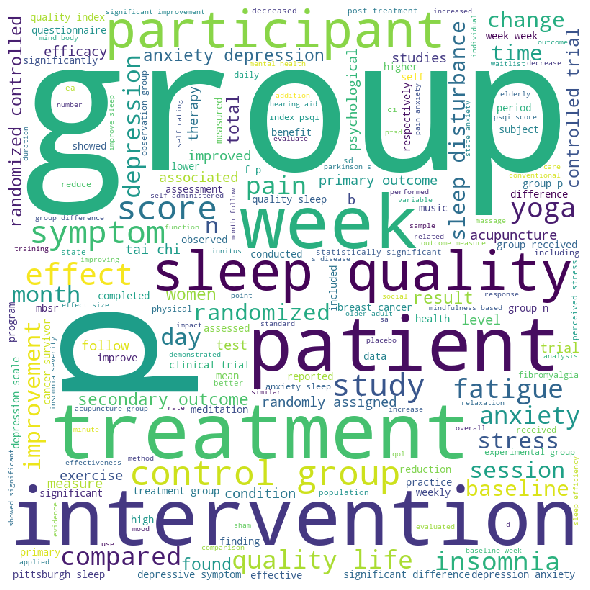

In [29]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloudtrain1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Word Frequency

In [16]:
from collections import Counter

In [23]:
totaldf1 = [df_train1, df_valid1]
result = pd.concat(totaldf1)
lst=result['Abstract'].tolist()

In [24]:
text = ' '.join([str(elem) for elem in lst]) 

In [25]:
type(text)

str

In [26]:
doc = nlp(text)

In [27]:
counts = Counter()
for token in doc:
    counts[token.orth_] += 1

In [28]:
#dftotal1(train+valid)
common_words = counts.most_common(30)
common_words

[('group', 742),
 ('were', 700),
 ('sleep', 591),
 ('0', 567),
 ('p', 518),
 ('was', 501),
 ('quality', 384),
 ('anxiety', 377),
 ('treatment', 340),
 ('depression', 306),
 ('patients', 302),
 ('intervention', 294),
 ('control', 288),
 ('symptoms', 255),
 ('1', 230),
 ('study', 228),
 ('significant', 223),
 ('participants', 208),
 ('2', 206),
 ('groups', 201),
 ('week', 199),
 ('3', 193),
 ('acupuncture', 189),
 ('stress', 185),
 ('weeks', 180),
 ('randomized', 176),
 ('pain', 167),
 ('yoga', 158),
 ('4', 150),
 ('insomnia', 149)]

In [22]:
#dftotal0(train+valid)
common_words = counts.most_common(30)
common_words

[('sleep', 537),
 ('were', 457),
 ('0', 397),
 ('treatment', 363),
 ('was', 335),
 ('quality', 301),
 ('studies', 282),
 ('study', 273),
 ('group', 269),
 ('depression', 268),
 ('participants', 252),
 ('intervention', 242),
 ('therapy', 242),
 ('patients', 235),
 ('anxiety', 215),
 ('1', 212),
 ('pain', 206),
 ('symptoms', 194),
 ('p', 175),
 ('acupuncture', 170),
 ('control', 168),
 ('will', 160),
 ('evidence', 158),
 ('2', 156),
 ('exercise', 151),
 ('effects', 151),
 ('randomized', 146),
 ('trial', 141),
 ('health', 138),
 ('controlled', 137)]